In [144]:
'''
ENCABECAZADO:
### Alumno: Montoya Gutiérrez Pavel
### Grupo: 5BV1
### Carrera: Ingeniería en Inteligencia Artificial
### Última fecha de modidicación: 9/11/2024
'''
#  CONSULTAR EL REPORTE PARA REVISAR LAS INSTRUCCIONES ESPECÍFICAs DE CADA EJERCICIO

import string

# Define the list of txt files
corpus = ['Letter1.txt', 'Letter2.txt', 'Letter3.txt']
text_corpus = []

# Read each txt file and append its content to text_corpus
for document in corpus:
    with open(document, 'r', encoding='utf-8') as f:
        
        text_corpus.append(f.read())

# Se imprime el texto antes de ser normalizado
text_corpus


['Letter 1\nTo Mrs. Saville, England.\n\nSt. Petersburgh, Dec. 11th, 17—.\n\nYou will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. I arrived here yesterday, and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking.\n\nI am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. Do you understand this feeling? This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes. Inspirited by this wind of promise, my daydreams become more fervent and vivid. I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents itself to my imagination as the region of beauty and delight. There, Margaret, the sun is for ever visible, its broad 

## TF-IDF 

### Frecuencia de palabras normalizadas

In [147]:
#Usar el pipeline 4 para este

def extract_keywords_normalized_word_frequency(processed_corpus, top_n=15):
    """
    Extrae las palabras más comunes basadas en la frecuencia normalizada de cada documento.

    Parámetros:
    - processed_corpus: Lista de listas de tokens procesados.
    - top_n: Número de palabras más comunes a extraer por documento.

    Retorna:
    - most_common_per_document: Lista de listas con las palabras más comunes por documento.
    """
    most_common_per_document = []

    for idx, tokens in enumerate(processed_corpus):
        # Contar frecuencias absolutas
        word_freq = Counter(tokens)
        # Obtener la frecuencia máxima en el documento
        if word_freq:
            max_freq = max(word_freq.values())
            # Normalizar las frecuencias dividiendo por la frecuencia máxima
            normalized_freq = {word: freq / max_freq for word, freq in word_freq.items()}
            # Ordenar las palabras por frecuencia normalizada en orden descendente
            sorted_words = sorted(normalized_freq.items(), key=lambda x: x[1], reverse=True)
            # Obtener las N palabras más comunes
            most_common_words = [word for word, freq in sorted_words[:top_n]]
        else:
            # Si no hay palabras después de eliminar stopwords, la lista estará vacía
            most_common_words = []
        # Agregar las palabras más comunes a la lista final
        most_common_per_document.append(most_common_words)
        
        # Imprimir las palabras más comunes para cada carta
        print(f"Carta {idx + 1}: {most_common_words}")    
    
    return most_common_per_document

# Llamar a la función
extract_keywords_normalized_word_frequency(processed_corpus, top_n=15)



Carta 1: ['may', 'dear', 'shall', 'many', 'petersburgh', 'sister', 'undertaking', 'north', 'cold', 'pole', 'ever', 'margaret', 'voyage', 'never', 'heaven']
Carta 2: ['friend', 'yet', 'shall', 'never', 'would', 'may', 'father', 'enterprise', 'courage', 'one', 'want', 'poor', 'man', 'romantic', 'well']
Carta 3: ['us', 'letter', 'england', 'well', 'voyage', 'dear', 'sister', 'towards', 'gales', 'shall', 'thus', 'heart', 'mrs.', 'saville', 'july']


[['may',
  'dear',
  'shall',
  'many',
  'petersburgh',
  'sister',
  'undertaking',
  'north',
  'cold',
  'pole',
  'ever',
  'margaret',
  'voyage',
  'never',
  'heaven'],
 ['friend',
  'yet',
  'shall',
  'never',
  'would',
  'may',
  'father',
  'enterprise',
  'courage',
  'one',
  'want',
  'poor',
  'man',
  'romantic',
  'well'],
 ['us',
  'letter',
  'england',
  'well',
  'voyage',
  'dear',
  'sister',
  'towards',
  'gales',
  'shall',
  'thus',
  'heart',
  'mrs.',
  'saville',
  'july']]

## Rake - NLTK

In [148]:
## Usar pipeline 3

from rake_nltk import Rake
import nltk

def extract_keywords_with_rake(processed_corpus, top_n=15):
    """
    Extrae palabras clave de cada documento en el corpus procesado utilizando RAKE.
    
    Parámetros:
    - processed_corpus: Lista de listas de tokens procesados.
    - top_n: Número de palabras clave a extraer por documento.
    
    Retorna:
    - all_keywords: Lista de listas con las palabras clave extraídas por documento.
    """
    # Asegurarse de que las stopwords están definidas
    stop_words = set(nltk.corpus.stopwords.words('english'))
    
    # Lista para almacenar las palabras clave de cada documento
    all_keywords = []
    
    # Iterar sobre cada documento en el corpus procesado
    for idx, doc_tokens in enumerate(processed_corpus):
        # Unir los tokens en una cadena de texto
        text = ' '.join(doc_tokens)
        
        # Crear una instancia de Rake con las stopwords adecuadas
        rake_nltk_var = Rake(stopwords=stop_words)
        
        # Extraer palabras clave del texto
        rake_nltk_var.extract_keywords_from_text(text)
        
        # Obtener las frases clave ordenadas por puntuación
        keyword_extracted = rake_nltk_var.get_ranked_phrases()
        
        # Seleccionar las N palabras clave más relevantes
        top_keywords = keyword_extracted[:top_n]
        
        # Agregar las palabras clave del documento actual a la lista general
        all_keywords.append(top_keywords)
        
        # Imprimir las palabras clave del documento actual
        print(f"Carta {idx + 1}: {top_keywords}")
    
    return all_keywords

extract_keywords_with_rake(processed_corpus, top_n=15)

Carta 1: ['snow frost banished sailing calm sea may wafted land surpassing wonders beauty every region hitherto discovered habitable globe productions features may without example phenomena heavenly bodies undoubtedly undiscovered solitudes may expected country eternal light may discover wondrous power attracts needle may regulate thousand celestial observations require voyage render seeming eccentricities consistent ever shall satiate ardent curiosity sight part world never visited may tread land never imprinted foot man enticements sufficient conquer fear danger death induce commence laborious voyage joy child feels embarks little boat holiday mates expedition discovery native river supposing conjectures false contest inestimable benefit shall confer mankind last generation discovering passage near pole countries reach present many months requisite ascertaining secret magnet possible effected undertaking mine reflections dispelled agitation began letter feel heart glow enthusiasm ele

[['snow frost banished sailing calm sea may wafted land surpassing wonders beauty every region hitherto discovered habitable globe productions features may without example phenomena heavenly bodies undoubtedly undiscovered solitudes may expected country eternal light may discover wondrous power attracts needle may regulate thousand celestial observations require voyage render seeming eccentricities consistent ever shall satiate ardent curiosity sight part world never visited may tread land never imprinted foot man enticements sufficient conquer fear danger death induce commence laborious voyage joy child feels embarks little boat holiday mates expedition discovery native river supposing conjectures false contest inestimable benefit shall confer mankind last generation discovering passage near pole countries reach present many months requisite ascertaining secret magnet possible effected undertaking mine reflections dispelled agitation began letter feel heart glow enthusiasm elevates he

## TextRank

In [149]:
#Usar pipeline 1 o 2

def extract_keywords_with_text_rank(processed_corpus, sentences_count=5, top_n=15):
    """
    Extrae palabras clave de cada documento en el corpus procesado utilizando Sumy con el método TextRank.
    
    Parámetros:
    - processed_corpus: Lista de listas de tokens procesados.
    - sentences_count: Número de oraciones a extraer en el resumen por documento.
    - top_n: Número de palabras clave a extraer por documento.
    
    Retorna:
    - all_keywords: Lista de listas con las palabras clave extraídas por documento.
    """
    from sumy.parsers.plaintext import PlaintextParser
    from sumy.nlp.tokenizers import Tokenizer
    from sumy.summarizers.text_rank import TextRankSummarizer
    from collections import Counter
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    import nltk

    # Definir las stopwords para el idioma inglés
    sumy_stopwords = set(stopwords.words('english'))
    
    # Inicializar el resumidor TextRank una sola vez para mejorar la eficiencia
    summarizer = TextRankSummarizer()
    summarizer.stop_words = sumy_stopwords
    
    # Lista para almacenar las palabras clave de cada documento
    all_keywords = []
    
    # Iterar sobre cada documento en el corpus procesado
    for idx, doc_tokens in enumerate(processed_corpus):
        # Unir los tokens para reconstruir el texto de la carta
        text = ' '.join(doc_tokens)
        
        # Verificar si el texto no está vacío
        if not text.strip():
            print(f"Carta {idx + 1}: Documento vacío o sin contenido relevante.")
            all_keywords.append([])
            continue
        
        # Crear un parser para el texto
        parser = PlaintextParser.from_string(text, Tokenizer('english'))
        
        # Crear el resumen utilizando TextRank
        sentences = summarizer(parser.document, sentences_count=sentences_count)
        
        # Extraer palabras clave de las oraciones seleccionadas
        word_counts = Counter()
        for sentence in sentences:
            # Tokenizar la oración y filtrar palabras no alfabéticas y stopwords
            words = [word.lower() for word in word_tokenize(str(sentence)) 
                     if word.isalpha() and word.lower() not in sumy_stopwords]
            word_counts.update(words)
        
        # Obtener las palabras clave más comunes
        keywords = [word for word, freq in word_counts.most_common(top_n)]
        
        # Agregar las palabras clave a la lista general
        all_keywords.append(keywords)
        
        # Imprimir las palabras clave de la carta actual
        print(f"Carta {idx + 1}: {keywords}")
    
    return all_keywords


extract_keywords_with_text_rank(processed_corpus, sentences_count=5, top_n=15)

Carta 1: ['may', 'dear', 'shall', 'many', 'petersburgh', 'sister', 'undertaking', 'north', 'cold', 'pole', 'ever', 'margaret', 'voyage', 'never', 'heaven']
Carta 2: ['friend', 'yet', 'shall', 'never', 'would', 'may', 'father', 'enterprise', 'courage', 'one', 'want', 'poor', 'man', 'romantic', 'well']
Carta 3: ['us', 'letter', 'england', 'well', 'voyage', 'dear', 'sister', 'towards', 'gales', 'shall', 'thus', 'heart', 'saville', 'july', 'th']


[['may',
  'dear',
  'shall',
  'many',
  'petersburgh',
  'sister',
  'undertaking',
  'north',
  'cold',
  'pole',
  'ever',
  'margaret',
  'voyage',
  'never',
  'heaven'],
 ['friend',
  'yet',
  'shall',
  'never',
  'would',
  'may',
  'father',
  'enterprise',
  'courage',
  'one',
  'want',
  'poor',
  'man',
  'romantic',
  'well'],
 ['us',
  'letter',
  'england',
  'well',
  'voyage',
  'dear',
  'sister',
  'towards',
  'gales',
  'shall',
  'thus',
  'heart',
  'saville',
  'july',
  'th']]

## BERT - Transformer

In [150]:
from transformers import AutoTokenizer, AutoModel
import torch

def extract_keywords_with_bert_attention(processed_corpus, top_k=15):
    """
    Extrae palabras clave de cada documento en el corpus procesado utilizando BERT y los pesos de atención.
    
    Parámetros:
    - processed_corpus: Lista de listas de tokens procesados.
    - top_k: Número de palabras clave a extraer por documento (por defecto, 15).
    
    Retorna:
    - all_keywords: Lista de listas con las palabras clave extraídas por documento.
    """
    # Configuración constante
    MAX_LENGTH = 512  # Longitud máxima permitida por el modelo
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Dispositivo para ejecutar el modelo
    
    print(f"Usando el dispositivo: {DEVICE}")
    
    # Cargar el modelo y el tokenizador
    tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
    model = AutoModel.from_pretrained('bert-base-uncased', output_attentions=True)
    model.to(DEVICE)
    model.eval()  # Establecer el modelo en modo de evaluación
    
    # Definir las stopwords para el idioma inglés
    stop_words = set(stopwords.words('english'))
    
    # Obtener los IDs de los tokens especiales para filtrarlos posteriormente
    special_token_ids = set(tokenizer.all_special_ids)
    
    # Lista para almacenar las palabras clave de cada documento
    all_keywords = []
    
    # Iterar sobre cada documento en el corpus procesado
    for idx, doc_tokens in enumerate(processed_corpus):
        # Unir los tokens para reconstruir el texto de la carta
        text = ' '.join(doc_tokens)
        
        # Verificar si el texto no está vacío
        if not text.strip():
            print(f"Carta {idx + 1}: Documento vacío o sin contenido relevante.")
            all_keywords.append([])
            continue
        
        # Codificar el texto
        input_ids = tokenizer.encode(text, add_special_tokens=True)
        
        # Dividir el input_ids en segmentos de longitud máxima
        input_chunks = [input_ids[i:i + MAX_LENGTH] for i in range(0, len(input_ids), MAX_LENGTH)]
        
        # Lista para almacenar las palabras clave de cada segmento
        doc_keywords = []
        
        with torch.no_grad():  # Desactivar gradientes para eficiencia
            for chunk in input_chunks:
                # Convertir el chunk a tensor y moverlo al dispositivo
                input_ids_chunk = torch.tensor([chunk]).to(DEVICE)
                
                # Obtener las salidas del modelo con los pesos de atención
                outputs = model(input_ids_chunk)
                
                # Obtener los pesos de atención
                attention_weights = outputs.attentions  # Es una tupla de tensores
                
                # Sumar los pesos de atención sobre las capas y las cabezas
                # Forma: (batch_size, num_heads, seq_len, seq_len)
                attentions = torch.stack(attention_weights).sum(dim=(0, 1))  # (seq_len, seq_len)
                
                # Sumar las atenciones para cada token
                token_importance = attentions.sum(dim=1)[0]  # (seq_len,)
                
                # Obtener los índices de los tokens con mayor importancia
                top_indices = torch.topk(token_importance, k=top_k).indices
                
                # Ordenar los índices para mantener el orden en el texto original
                top_indices = top_indices.sort().values
                
                # Extraer los tokens correspondientes
                top_tokens = input_ids_chunk[0][top_indices]
                
                # Decodificar los tokens y agregar a la lista de palabras clave
                top_keywords = [tokenizer.decode([token], clean_up_tokenization_spaces=True) for token in top_tokens]
                
                # Filtrar tokens especiales y palabras en stopwords
                filtered_keywords = [
                    kw.lower() for kw in top_keywords
                    if tokenizer.encode(kw, add_special_tokens=False)[0] not in special_token_ids
                    and kw.lower() not in stop_words
                    and kw.isalpha()  # Asegurarse de que la palabra es alfabética
                ]
                
                doc_keywords.extend(filtered_keywords)
        
        # Eliminar duplicados manteniendo el orden
        seen = set()
        doc_keywords_unique = []
        for word in doc_keywords:
            if word not in seen:
                seen.add(word)
                doc_keywords_unique.append(word)
        
        # Limitar a top_k palabras clave si es necesario
        doc_keywords_unique = doc_keywords_unique[:top_k]
        
        # Agregar las palabras clave del documento actual a la lista general
        all_keywords.append(doc_keywords_unique)
        
        # Imprimir las palabras clave de la carta actual
        print(f"Carta {idx +1}: {doc_keywords_unique}")
    
    return all_keywords

extract_keywords_with_bert_attention(processed_corpus, top_k=15)


Usando el dispositivo: cpu


c:\Users\pavel\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (689 > 512). Running this sequence through the model will result in indexing errors


Carta 1: ['hear', 'streets', 'feel', 'gives', 'accounts', 'library', 'shakespeare', 'valuable', 'dear', 'deserve', 'oh', 'spirits', 'stagecoach', 'dress', 'ambition']
Carta 2: ['england', 'slowly', 'appear', 'friend', 'story', 'russian', 'marriage', 'lover', 'turk', 'wave', 'resolutions', 'shall', 'poets', 'execute', 'labour']
Carta 3: ['write', 'lines', 'appear', 'us', 'letter', 'record', 'shall', 'dear', 'witnesses', 'bless']


[['hear',
  'streets',
  'feel',
  'gives',
  'accounts',
  'library',
  'shakespeare',
  'valuable',
  'dear',
  'deserve',
  'oh',
  'spirits',
  'stagecoach',
  'dress',
  'ambition'],
 ['england',
  'slowly',
  'appear',
  'friend',
  'story',
  'russian',
  'marriage',
  'lover',
  'turk',
  'wave',
  'resolutions',
  'shall',
  'poets',
  'execute',
  'labour'],
 ['write',
  'lines',
  'appear',
  'us',
  'letter',
  'record',
  'shall',
  'dear',
  'witnesses',
  'bless']]

### Latent Semantic Analysis

In [151]:

# Crear el modelo LSI
from gensim.corpora import Dictionary
from gensim.models import LsiModel

def extract_keywords_with_lsi(processed_corpus, num_topics=8, top_n_topics=2, top_n_terms=10):
    """
    Extrae palabras clave de cada documento en el corpus procesado utilizando LSI.
    
    Parámetros:
    - processed_corpus: Lista de listas de tokens procesados.
    - num_topics: Número de temas para el modelo LSI (por defecto, 8).
    - top_n_topics: Número de temas principales a considerar por documento (por defecto, 2).
    - top_n_terms: Número de términos más importantes por tema (por defecto, 10).
    
    Retorna:
    - all_keywords: Lista de listas con las palabras clave extraídas por documento.
    """
    # Crear un diccionario a partir del corpus procesado
    dictionary = Dictionary(processed_corpus)
    
    # Crear el corpus bag-of-words
    bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
    
    # Crear el modelo LSI
    lsi_model = LsiModel(bow_corpus, id2word=dictionary, num_topics=num_topics)
    
    # Lista para almacenar las palabras clave de cada documento
    all_keywords = []
    
    print("Palabras clave por documento:")
    
    # Iterar sobre cada documento en el corpus
    for doc_idx, doc_bow in enumerate(bow_corpus):
        # Transformar el documento al espacio LSI
        doc_lsa = lsi_model[doc_bow]
        
        # Ordenar los temas por su contribución al documento
        doc_lsa_sorted = sorted(doc_lsa, key=lambda x: abs(x[1]), reverse=True)
        
        # Seleccionar los temas más relevantes
        top_topics = doc_lsa_sorted[:top_n_topics]
        
        # Obtener los términos más importantes de los temas relevantes
        important_terms = []
        for topic_idx, topic_weight in top_topics:
            # Obtener los términos del tema
            terms_in_topic = lsi_model.show_topic(topic_idx, topn=top_n_terms)
            terms = [term for term, weight in terms_in_topic]
            important_terms.extend(terms)
        
        # Eliminar duplicados manteniendo el orden
        important_terms_unique = list(dict.fromkeys(important_terms))
        
        # Agregar las palabras clave del documento actual a la lista general
        all_keywords.append(important_terms_unique)
        
        # Imprimir las palabras clave de la carta actual
        print(f"Carta {doc_idx +1}: {important_terms_unique}")
    
    return all_keywords

extract_keywords_with_lsi(processed_corpus, num_topics=8, top_n_topics=2, top_n_terms=10)

Palabras clave por documento:
Carta 1: ['may', 'shall', 'never', 'yet', 'friend', 'would', 'years', 'life', 'father', 'dear', 'many', 'heaven', 'pole', 'petersburgh', 'might']
Carta 2: ['may', 'shall', 'never', 'yet', 'friend', 'would', 'years', 'life', 'father', 'dear', 'many', 'heaven', 'pole', 'petersburgh', 'might']
Carta 3: ['us', 'england', 'letter', 'well', 'voyage', 'thus', 'gales', 'towards', 'heart', 'sister', 'may', 'shall', 'never', 'yet', 'friend', 'would', 'years', 'life', 'father', 'dear']


[['may',
  'shall',
  'never',
  'yet',
  'friend',
  'would',
  'years',
  'life',
  'father',
  'dear',
  'many',
  'heaven',
  'pole',
  'petersburgh',
  'might'],
 ['may',
  'shall',
  'never',
  'yet',
  'friend',
  'would',
  'years',
  'life',
  'father',
  'dear',
  'many',
  'heaven',
  'pole',
  'petersburgh',
  'might'],
 ['us',
  'england',
  'letter',
  'well',
  'voyage',
  'thus',
  'gales',
  'towards',
  'heart',
  'sister',
  'may',
  'shall',
  'never',
  'yet',
  'friend',
  'would',
  'years',
  'life',
  'father',
  'dear']]

In [152]:
def word_extraction_general(raw_corpus, model, pipeline_version):
    """
    Extrae palabras clave de cada documento en el corpus utilizando la técnica especificada y una versión de pipeline dada.
    
    Parámetros:
    - raw_corpus: Lista de cadenas de texto (documentos originales).
    - model: Cadena que especifica la técnica de extracción ('frequency', 'rake', 'text_rank', 'bert_attention', 'lsi').
    - pipeline_version: Entero que indica la versión del pipeline de normalización (1, 2, 3 o 4).
    
    Retorna:
    - all_keywords: Lista de listas con las palabras clave extraídas por documento.
    """
    # Normalizar el corpus según la versión del pipeline
    processed_corpus = normalization(raw_corpus=raw_corpus, pipeline_version=pipeline_version)
    
    # Diccionario para mapear los nombres de modelos a las funciones correspondientes
    model_functions = {
        'frequency': extract_keywords_with_frequency,
        'rake': extract_keywords_with_rake,
        'text_rank': extract_keywords_with_text_rank,
        'bert_attention': extract_keywords_with_bert_attention,
        'lsi': extract_keywords_with_lsi
    }
    
    # Verificar si el modelo especificado es válido
    if model not in model_functions:
        raise ValueError(f"Modelo de extracción de palabras clave '{model}' no reconocido. "
                         f"Por favor, elige uno de los siguientes: {list(model_functions.keys())}.")
    
    # Obtener la función correspondiente
    extraction_function = model_functions[model]
    
    # Llamar a la función de extracción de palabras clave
    if model == 'frequency':
        # Si la función tiene parámetros adicionales, puedes pasarlos aquí
        all_keywords = extraction_function(processed_corpus, top_n=15)  # top_n puede ser ajustado
    elif model == 'rake':
        all_keywords = extraction_function(processed_corpus, top_n=5)  # top_n puede ser ajustado
    elif model == 'text_rank':
        all_keywords = extraction_function(processed_corpus, sentences_count=5, top_n=15)  # Ajustar según sea necesario
    elif model == 'bert_attention':
        all_keywords = extraction_function(processed_corpus, top_k=15)  # top_k puede ser ajustado
    elif model == 'lsi':
        all_keywords = extraction_function(processed_corpus, num_topics=8, top_n_topics=2, top_n_terms=10)  # Ajustar según sea necesario
    else:
        # Este caso nunca debería ocurrir debido a la verificación previa
        all_keywords = []
    
    return all_keywords



=== Modelo: frequency, Pipeline Versión: 1 ===
Carta 1: ['may', 'voyag', 'dear', 'feel', 'shall']
Carta 2: ['friend', 'yet', 'shall', 'never', 'would']
Carta 3: ['us', 'letter', 'england', 'well', 'voyag']

=== Modelo: frequency, Pipeline Versión: 2 ===
Carta 1: ['may', 'voyage', 'great', 'dear', 'feel']
Carta 2: ['friend', 'yet', 'shall', 'never', 'would']
Carta 3: ['u', 'letter', 'england', 'well', 'voyage']

=== Modelo: frequency, Pipeline Versión: 3 ===
Carta 1: [',', '.', ';', 'may', '?']
Carta 2: [',', '.', ';', 'friend', 'yet']
Carta 3: [',', '.', 'u', 'letter', 'england']

=== Modelo: frequency, Pipeline Versión: 4 ===
Carta 1: ['may', 'dear', 'shall', 'many', 'petersburgh']
Carta 2: ['friend', 'yet', 'shall', 'never', 'would']
Carta 3: ['us', 'letter', 'england', 'well', 'voyage']

=== Modelo: rake, Pipeline Versión: 1 ===
Carta 1: ['letter mr savil england st petersburgh dec th rejoic hear disast accompani commenc enterpris regard evil forebod arriv yesterday first task assu

c:\Users\pavel\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (912 > 512). Running this sequence through the model will result in indexing errors


Carta 1: ['benefit', 'made', 'para', 'homer', 'shall']
Carta 2: ['england', 'ran', 'midst', 'paid', 'saw']
Carta 3: ['record', 'dear']

=== Modelo: bert_attention, Pipeline Versión: 2 ===
Usando el dispositivo: cpu


Token indices sequence length is longer than the specified maximum sequence length for this model (669 > 512). Running this sequence through the model will result in indexing errors


Carta 1: ['london', 'feel', 'library', 'every', 'oh']
Carta 2: ['friend', 'board', 'heard', 'bound', 'season']
Carta 3: ['record', 'shall', 'bless']

=== Modelo: bert_attention, Pipeline Versión: 3 ===
Usando el dispositivo: cpu


Token indices sequence length is longer than the specified maximum sequence length for this model (817 > 512). Running this sequence through the model will result in indexing errors


Carta 1: ['whale']
Carta 2: ['read', 'buy']
Carta 3: []

=== Modelo: bert_attention, Pipeline Versión: 4 ===
Usando el dispositivo: cpu


Token indices sequence length is longer than the specified maximum sequence length for this model (689 > 512). Running this sequence through the model will result in indexing errors


Carta 1: ['valuable', 'dear']
Carta 2: ['wave']
Carta 3: ['lines']

=== Modelo: lsi, Pipeline Versión: 1 ===
Palabras clave por documento:
Carta 1: ['may', 'shall', 'never', 'feel', 'voyag', 'yet', 'friend', 'year', 'would', 'pass', 'dear', 'mani', 'heaven', 'pole', 'expedit']
Carta 2: ['may', 'shall', 'never', 'feel', 'voyag', 'yet', 'friend', 'year', 'would', 'pass', 'dear', 'mani', 'heaven', 'pole', 'expedit']
Carta 3: ['us', 'england', 'well', 'letter', 'voyag', 'gale', 'thu', 'reach', 'advanc', 'danger', 'may', 'shall', 'never', 'feel', 'yet', 'friend', 'year', 'would', 'pass']

=== Modelo: lsi, Pipeline Versión: 2 ===
Palabras clave por documento:
Carta 1: ['may', 'shall', 'never', 'voyage', 'yet', 'year', 'friend', 'feel', 'would', 'life', 'great', 'dear', 'many', 'heaven', 'pole']
Carta 2: ['may', 'shall', 'never', 'voyage', 'yet', 'year', 'friend', 'feel', 'would', 'life', 'great', 'dear', 'many', 'heaven', 'pole']
Carta 3: ['u', 'england', 'well', 'letter', 'voyage', 'gale', 

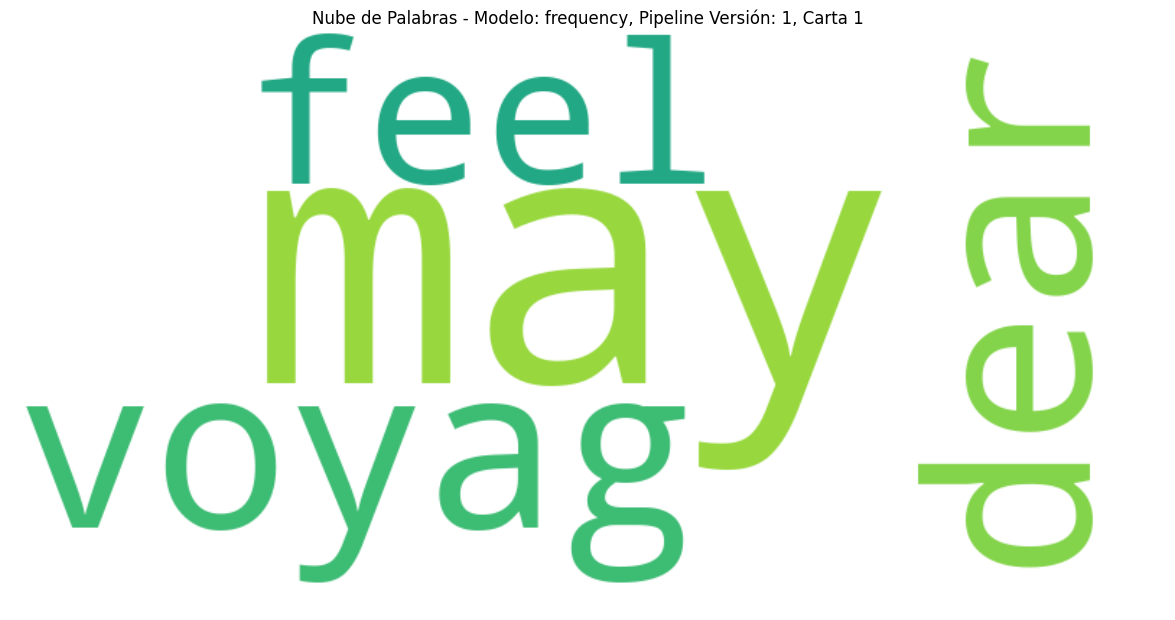

In [ ]:

# Función General de Extracción
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import itertools

def word_extraction_general(raw_corpus, model, pipeline_version):
    """
    Extrae palabras clave de cada documento en el corpus utilizando la técnica especificada y una versión de pipeline dada.

    Parámetros:
    - raw_corpus: Lista de cadenas de texto (documentos originales).
    - model: Cadena que especifica la técnica de extracción ('frequency', 'rake', 'text_rank', 'bert_attention', 'lsi').
    - pipeline_version: Entero que indica la versión del pipeline de normalización (1, 2, 3 o 4).

    Retorna:
    - all_keywords: Lista de listas con las palabras clave extraídas por documento.
    """
    # Normalizar el corpus según la versión del pipeline
    processed_corpus = normalization(raw_corpus=raw_corpus, pipeline_version=pipeline_version)
    
    # Diccionario para mapear los nombres de modelos a las funciones correspondientes
    model_functions = {
        'tfidf' : extract_keywords_tfidf,
        'frequency': extract_keywords_normalized_word_frequency,
        'rake': extract_keywords_with_rake,
        'text_rank': extract_keywords_with_text_rank,
        'bert_attention': extract_keywords_with_bert_attention,
        'lsi': extract_keywords_with_lsi
    }
    
    # Verificar si el modelo especificado es válido
    if model not in model_functions:
        raise ValueError(f"Modelo de extracción de palabras clave '{model}' no reconocido. "
                         f"Por favor, elige uno de los siguientes: {list(model_functions.keys())}.")
    
    # Obtener la función correspondiente
    extraction_function = model_functions[model]
    
    # Llamar a la función de extracción de palabras clave
    if model == 'tfidf':
        all_keywords = extraction_function(processed_corpus, top_n=5)
    elif model == 'frequency':
        all_keywords = extraction_function(processed_corpus, top_n=5)  # top_n puede ser ajustado
    elif model == 'rake':
        all_keywords = extraction_function(processed_corpus, top_n=5)  # top_n puede ser ajustado
    elif model == 'text_rank':
        all_keywords = extraction_function(processed_corpus, sentences_count=5, top_n=5)  # Ajustar según sea necesario
    elif model == 'bert_attention':
        all_keywords = extraction_function(processed_corpus, top_k=5)  # top_k puede ser ajustado
    elif model == 'lsi':
        all_keywords = extraction_function(processed_corpus, num_topics=8, top_n_topics=2, top_n_terms=10)  # Ajustar según sea necesario
    else:
        # Este caso nunca debería ocurrir debido a la verificación previa
        all_keywords = []
    
    return all_keywords

# ===========================
# Lectura del Corpus
# ===========================

def read_corpus(file_list):
    """
    Lee múltiples archivos de texto y retorna una lista con su contenido.

    Parámetros:
    - file_list: Lista de nombres de archivos.

    Retorna:
    - raw_corpus: Lista de cadenas de texto.
    """
    raw_corpus = []
    for file_name in file_list:
        try:
            with open(file_name, 'r', encoding='utf-8') as f:
                raw_corpus.append(f.read())
        except FileNotFoundError:
            print(f"El archivo {file_name} no se encontró. Por favor, verifica la ruta.")
    return raw_corpus


# Ejecución de Todas las Combinaciones

def main():
    """
    Función principal que ejecuta todas las combinaciones de modelos y pipelines.
    """
    # Definir la lista de archivos txt
    corpus_files = ['Letter1.txt', 'Letter2.txt', 'Letter3.txt']  # Asegúrate de que estos archivos existan
    raw_corpus = read_corpus(corpus_files)
    
    # Definir las versiones de pipelines y modelos
    pipeline_versions = [1, 2, 3, 4]
    models = ['frequency', 'rake', 'text_rank', 'bert_attention', 'lsi']
    
    # Crear todas las combinaciones posibles
    combinations = list(itertools.product(models, pipeline_versions))
    
    # Crear una estructura para almacenar los resultados
    results = []
    
    # Iterar sobre cada combinación y extraer palabras clave
    for model, pipeline_version in combinations:
        print(f"\n=== Modelo: {model}, Pipeline Versión: {pipeline_version} ===")
        try:
            keywords = word_extraction_general(raw_corpus, model, pipeline_version)
            results.append({
                'model': model,
                'pipeline_version': pipeline_version,
                'keywords': keywords
            })
        except Exception as e:
            print(f"Error al procesar Modelo: {model}, Pipeline Versión: {pipeline_version}. Error: {e}")

    # Almacenamiento de Resultados

    
    # Guardar los resultados en un archivo CSV
    with open('word_extraction_results.csv', mode='w', newline='', encoding='utf-8') as csv_file:
        fieldnames = ['model', 'pipeline_version', 'document', 'keywords']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        
        writer.writeheader()
        for result in results:
            model = result['model']
            pipeline_version = result['pipeline_version']
            for doc_idx, keywords in enumerate(result['keywords']):
                writer.writerow({
                    'model': model,
                    'pipeline_version': pipeline_version,
                    'document': f'Carta {doc_idx +1}',
                    'keywords': ', '.join(keywords)
                })
    
    print("\nTodos los modelos y pipelines han sido procesados. Los resultados se han guardado en 'word_extraction_results.csv'.")
    

if __name__ == "__main__":
    main()


In [155]:
import pandas as pd

resultados = pd.read_csv("word_extraction_results.csv")
resultados
                        

,model,pipeline_version,document,keywords
0,frequency,1,Carta 1,"may, voyag, dear, feel, shall"
1,frequency,1,Carta 2,"friend, yet, shall, never, would"
2,frequency,1,Carta 3,"us, letter, england, well, voyag"
3,frequency,2,Carta 1,"may, voyage, great, dear, feel"
4,frequency,2,Carta 2,"friend, yet, shall, never, would"
5,frequency,2,Carta 3,"u, letter, england, well, voyage"
6,frequency,3,Carta 1,",, ., ;, may, ?"
7,frequency,3,Carta 2,",, ., ;, friend, yet"
8,frequency,3,Carta 3,",, ., u, letter, england"
9,frequency,4,Carta 1,"may, dear, shall, many, petersburgh"
